In [8]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from math import isclose

from collections import Counter


In [9]:
def get_the_characteristics(data):
    mean = sum(data) / len(data)
    variance = sum([(x - mean) ** 2 for x in data]) / len(data)
    rms_deviation = np.sqrt(variance)

    return mean, variance, rms_deviation

In [10]:
# Функция для обрезания краевых значений
# Находим значения квартилей, делаем разброс с запасом
# Берем то, что в интервале
def z_score_cleaning(values, z = 3.0):
    data = np.array(values)
    
    mean_val, _, std_dev = get_the_characteristics(data)
    
    z_scores = np.abs((data - mean_val) / std_dev)
    
    filtered_data = [x for x, z_score in zip(data, z_scores) if z_score <= z]
    
    return filtered_data

In [11]:
# Функция для определения кол-ва столбцов в гистограмме
def get_bins_count(count):
    if count > 40: 
        for i in range(40, 19, -1):
            if count % i == 0:
                count = i
                break
        else:
            count = 40 
    
    return count

In [12]:
def plot_normal_histogram(mean, rms_deviation, i):
    data = np.random.normal(mean, rms_deviation, size=100000)


    plt.subplot(2, 3, i)
    plt.hist(data, bins=15, color='blue', edgecolor='hotpink')
    plt.title('Нормальное')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.subplot(2, 3, i)
    #plt.show()

# Мат ожидание 1/p
# Дисперсия p/q^2
def plot_geometric_histogram(mean, i):
    p = 1 / mean
    if p > 1:
        print('Невозможно построить геометрическое распределение. Вероятнасть должна быть в промежутке [0, 1]')
        raise exception

    data = np.random.geometric(p, size=1000000)

    plt.subplot(2, 3, i)
    plt.hist(data, bins=15, color='blue', edgecolor='hotpink')
    plt.title('Геометрическое')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    #plt.show()


# Дисперсия = npq
# Мат ожидание = np
def plot_binomial_histogram(mean, rms_deviation, i):        
    p = 1 - (rms_deviation / mean)
    
    if p > 1 or p < 0:
        print('Невозможно построить геометрическое распределение. Вероятнасть должна быть в промежутке [0, 1]')
        raise exception

    n = round(mean / p)

    data = np.random.binomial(n, p, size=1000000)

    plt.subplot(2, 3, i)
    plt.hist(data, bins=15, color='blue', edgecolor='hotpink')
    plt.title('Биномиальное')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    #plt.show()

# Дисперсия = мат ожидание
def plot_poisson_histogram(mean, i):
    data = np.random.poisson(mean, 1000000)

    if not isclose(mean, rms_deviation, abs_tol=0.001):
        print("Невозможно построить распределение Пуассона. Дисперсия и мат ожидания должны быть равны")
        raise exception
        return


    plt.subplot(2, 3, i)
    plt.hist(data, bins=15, color='blue', edgecolor='hotpink')
    plt.title('Пуассона')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    #plt.show()

# Мат ожидание = (а + b) / 2  
# Дисперсия = (b - a)^2 / 12
def plot_uniform_histogram(a, b, i):

    if (a > b):
        print("Невозможно построить равномерное распределение. Некорректные значения интервалов")
        raise exception


        
    data = np.random.uniform(a, b, 1000000)

    plt.subplot(2, 3, i)
    plt.hist(data, bins=15, color='blue', edgecolor='hotpink')
    plt.title('Равномерное')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    #plt.show()
    
# Дисперсия = Мат ожидание^2
def plot_exponential_histogram(mean, i):
    
    if (not isclose(mean, rms_deviation, abs_tol=0.001)):
        print("Невозможно построить экспоненциальное распределения! Дисперсия должна быть равна мат ожиданию в квадрате")
        raise exception
        return

    
    data = np.random.exponential(scale=1/mean, size=1000000)

    plt.subplot(2, 3, i)
    plt.hist(data, bins=15, color='blue', edgecolor='hotpink')
    plt.title('Экспоненциальное')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    #plt.show()

In [13]:
def plot_histogram(data):
    plt.hist(x = data.keys(), weights=data.values(), bins=get_bins_count(len(values)), color='hotpink', edgecolor='blue')

    plt.title('Гистограмма')
    plt.xlabel('Значения')
    plt.ylabel('Частота')

    plt.show()

In [14]:
def plot_all_histograms(mean: float, rms_deviation: float, a: float, b: float) -> None:
    plt.figure(figsize=(12, 8))

    i = 1
    try:
        plot_normal_histogram(mean, rms_deviation, i)
        i+=1
    except:
        pass

    try:
        plot_geometric_histogram(mean, i)
        i+=1
    except:
        pass
    
    try:
        plot_binomial_histogram(mean, rms_deviation, i)
        i+=1
    except:
        pass
    
    try:
        plot_uniform_histogram(a, b, i)
        i+=1
    except:
        pass
    
    try:
        plot_exponential_histogram(mean, i)
        i+=1
    except:
        pass


    try:
        plot_poisson_histogram(mean, i)
        i+=1
    except:
        pass

    plt.tight_layout()
    plt.show()
    

In [15]:
def plot_cum_distribution_function(values, probabilities):
    plt.hist(values.keys(), weights=list(map(lambda i: i[1] , probabilities)), bins=15, color='red', edgecolor='black', cumulative=True)

    plt.xlabel('Значения')
    plt.ylabel('Значение вероятности')
    plt.title('Функция распределения')
    plt.show()

In [16]:
#set_1 - 3.5
#set_2 - 1.5
#set_3 - 1.5
def read_n_clean_data(filePath, threshold = 3): 
    values = pd.read_csv(filePath, header=None, on_bad_lines='skip').values.tolist()[0]
    values = z_score_cleaning(values, threshold)
    values = Counter(values)
    return values

In [17]:
def find_probabilities(values):
    total_count = sum(values.values())
    probabilities = list(map(lambda i: (i[0], i[1] / total_count) , values.items()))
    return probabilities

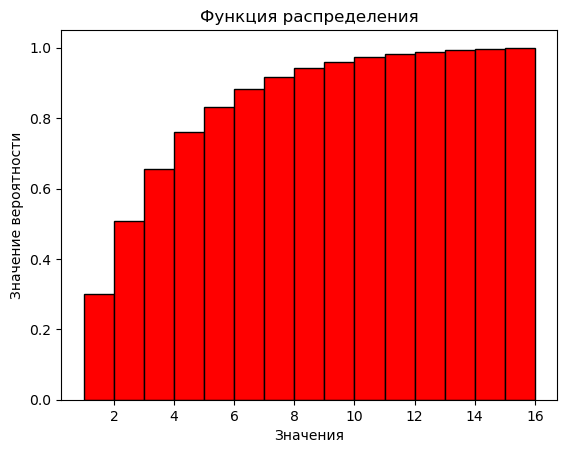

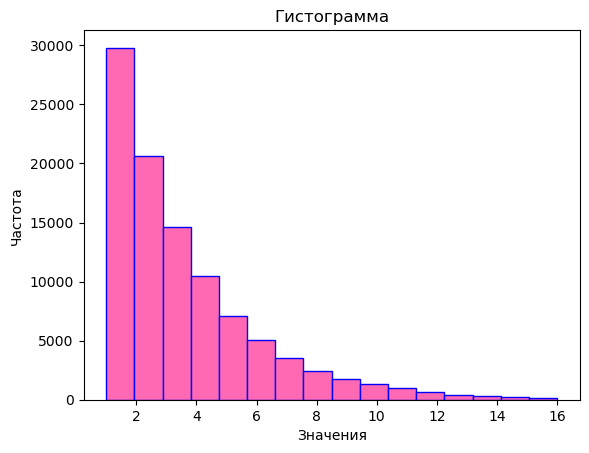

Невозможно построить экспоненциальное распределения! Дисперсия должна быть равна мат ожиданию в квадрате
Невозможно построить распределение Пуассона. Дисперсия и мат ожидания должны быть равны


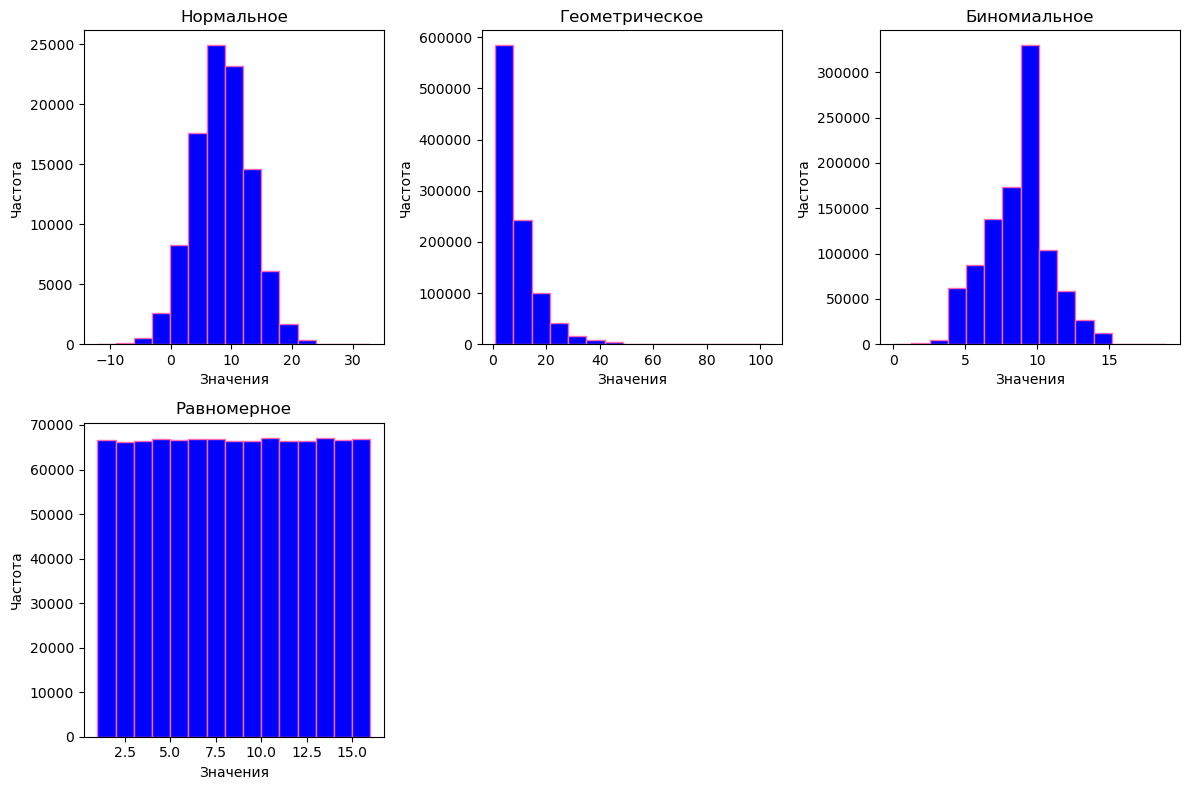

In [18]:
values = read_n_clean_data(f"C:\lab1\set_1.csv", 4)
probabilities = find_probabilities(values)

mean, variance, rms_deviation = get_the_characteristics(values)


plot_cum_distribution_function(values, probabilities)
plot_histogram(values)
plot_all_histograms(mean, rms_deviation, min(values.keys()), max(values.keys()))

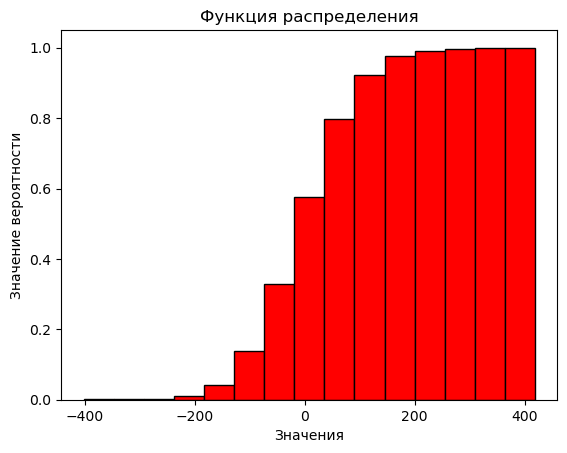

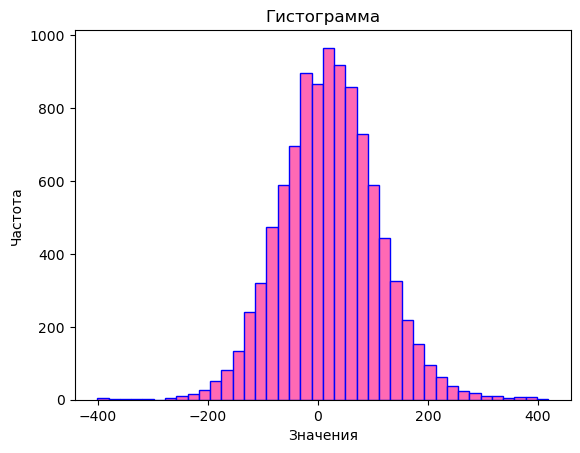

Невозможно построить геометрическое распределение. Вероятнасть должна быть в промежутке [0, 1]
Невозможно построить экспоненциальное распределения! Дисперсия должна быть равна мат ожиданию в квадрате
Невозможно построить распределение Пуассона. Дисперсия и мат ожидания должны быть равны


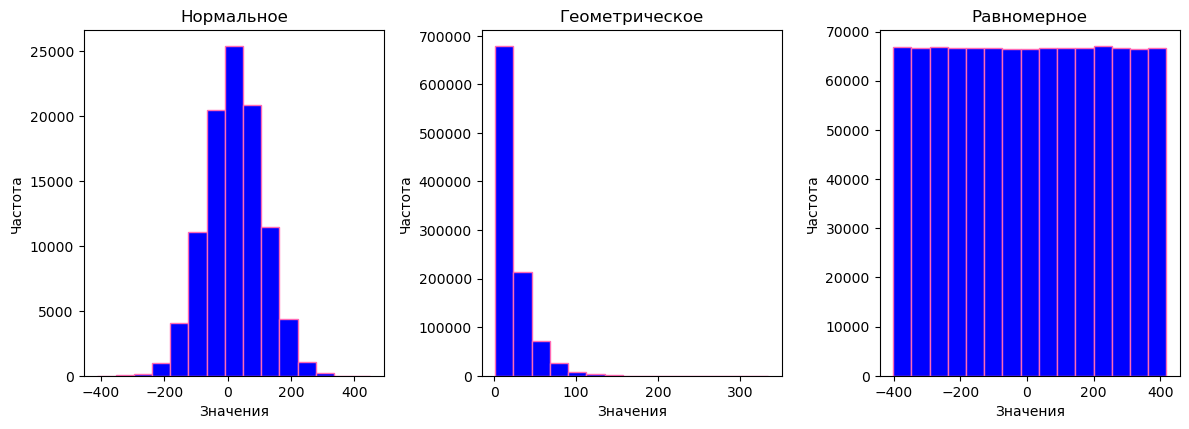

In [19]:
values = read_n_clean_data(f"C:\lab1\set_2.csv", 4)
probabilities = find_probabilities(values)

mean, variance, rms_deviation = get_the_characteristics(values)


plot_cum_distribution_function(values, probabilities)
plot_histogram(values)
plot_all_histograms(mean, rms_deviation, min(values.keys()), max(values.keys()))

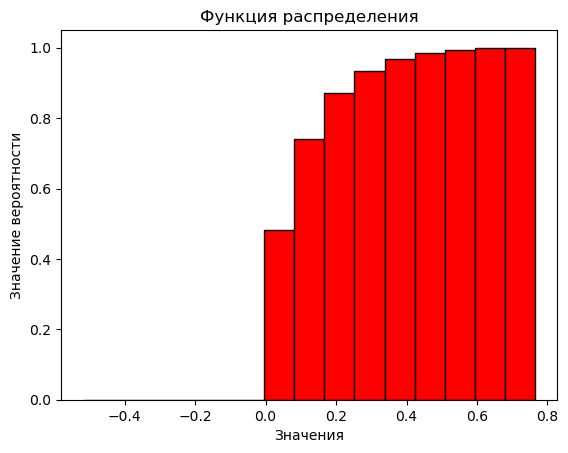

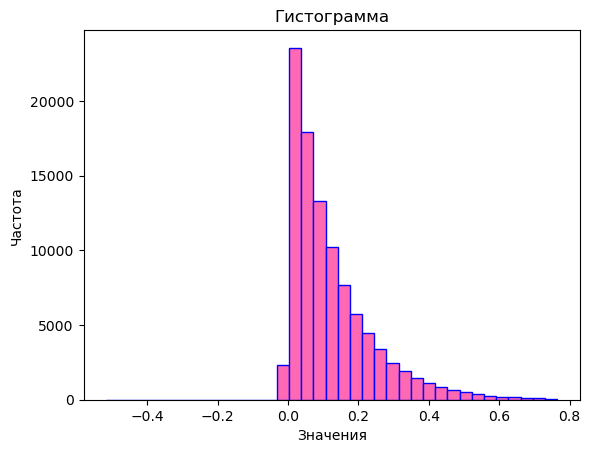

Невозможно построить геометрическое распределение. Вероятнасть должна быть в промежутке [0, 1]
Невозможно построить экспоненциальное распределения! Дисперсия должна быть равна мат ожиданию в квадрате
Невозможно построить распределение Пуассона. Дисперсия и мат ожидания должны быть равны


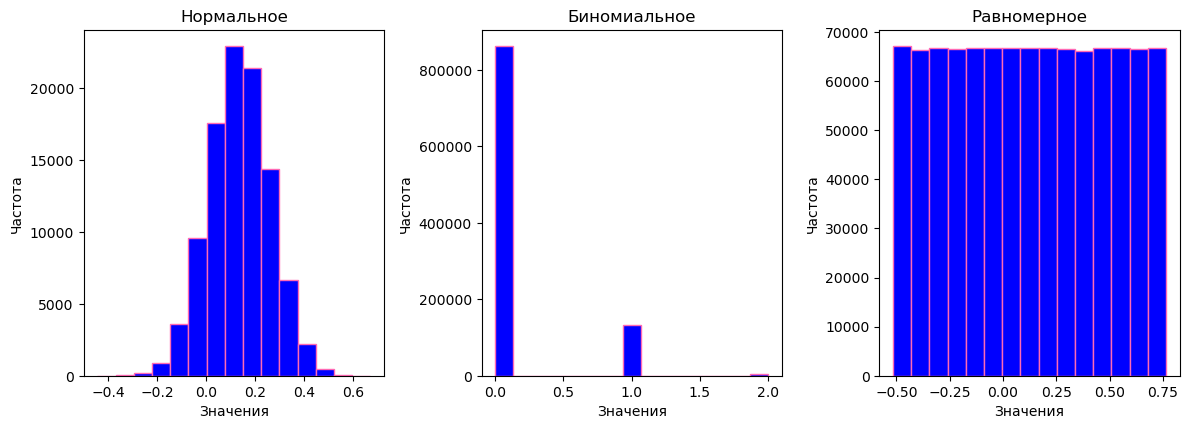

In [20]:
values = read_n_clean_data(f"C:\lab1\set_3.csv", 4)
probabilities = find_probabilities(values)

mean, variance, rms_deviation = get_the_characteristics(values)


plot_cum_distribution_function(values, probabilities)
plot_histogram(values)
plot_all_histograms(mean, rms_deviation, min(values.keys()), max(values.keys()))